**Load Libraries**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Data Loading and Initial Exploration**

In [3]:
df = pd.read_csv('pseudoProcess.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662194 entries, 0 to 3662193
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   iOSVersion         object 
 1   iOSModel           object 
 2   pid                float64
 3   readableTimestamp  object 
 4   timestamp          int64  
 5   id                 int64  
 6   device             object 
 7   scan               object 
 8   procName           object 
dtypes: float64(1), int64(2), object(6)
memory usage: 251.5+ MB


In [5]:
df.head()

,iOSVersion,iOSModel,pid,readableTimestamp,timestamp,id,device,scan,procName
0,17.4.1,"iPhone13,2",610.0,2024-04-17 11:34:21+00,1713353661,4105458,Device55,Scan1,ckdiscretionaryd
1,17.4.1,"iPhone13,2",605.0,2024-04-17 11:34:21+00,1713353661,4105459,Device55,Scan1,SiriSuggestionsLightHousePlugin
2,17.4.1,"iPhone13,2",598.0,2024-04-17 11:34:21+00,1713353661,4105460,Device55,Scan1,dprivacyd
3,17.4.1,"iPhone13,2",595.0,2024-04-17 11:34:21+00,1713353661,4105461,Device55,Scan1,activityawardsd
4,17.4.1,"iPhone13,2",713.0,2024-04-17 13:51:13+00,1713361873,4105462,Device55,Scan1,DASDelegateService


**Data Cleaning and Preprocessing**
1. Check for missing values
2. Convert timestamps fields to datetime objects
3. Ensure PID is an integer
4. Remove date before 2024
5. Ensure there are no duplicate values??

In [6]:
# Check for missing values
print(df.isnull().sum())

iOSVersion               0
iOSModel                 0
pid                  13074
readableTimestamp        0
timestamp                0
id                       0
device                   0
scan                     0
procName                 0
dtype: int64


**Why is PID null?**

In [7]:
df[df['pid'].isna()].sample(10)

,iOSVersion,iOSModel,pid,readableTimestamp,timestamp,id,device,scan,procName
2401615,17.4.1,"iPhone16,1",NaN,2024-03-19 21:56:04+00,1710870964,17464063,Device37,Scan721,libswiftCore.dylib
1510679,17.4.1,"iPhone16,1",NaN,2024-04-19 13:31:33+00,1713562293,15803772,Device38,Scan177,libxpc.dylib
3169008,17.3.1,"iPhone13,2",NaN,2024-03-19 10:02:03+00,1710842523,1551738,Device47,Scan888,IvyCommon
1677732,15.0.1,"iPhone10,6",NaN,2024-03-18 20:40:58+00,1710798058,16103408,Device39,Scan217,dyld
1392981,17.3.1,"iPhone16,1",NaN,2024-02-15 22:14:19+00,1708038859,15627098,Device36,Scan154,Observable
3249781,16.7.7,"iPhone10,4",NaN,2024-04-05 12:47:04+00,1712324824,1725104,Device48,Scan924,FirebaseWrapper
1458041,17.4.1,"iPhone16,1",NaN,2024-04-04 10:26:42+00,1712233602,15732638,Device38,Scan165,SnapKit
521168,17.3.1,"iPad13,10",NaN,2024-02-27 09:36:51+00,1709030211,13487404,Device20,Scan64,HomeWidgetExtension
2384875,17.4.1,"iPhone16,1",NaN,2024-03-20 20:26:18+00,1710948378,17432263,Device37,Scan721,MarqueeLabel
2661253,17.3.1,"iPhone13,2",NaN,2024-03-19 10:02:03+00,1710842523,269735,Device47,Scan888,FirebaseWrapper


We will drop these rows for now.

In [8]:
# Convert timestamp to datetime
df['readableTimestamp'] = pd.to_datetime(df['readableTimestamp'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


In [9]:
print(df['readableTimestamp'].min())
print(df['timestamp'].min())

1970-01-25 10:59:24+00:00
1970-01-25 10:59:24


Check for these timestamps

In [11]:
df['readableTimestamp'].dt.year.value_counts()

2024    2578827
2023     653614
2022     411049
2021      11136
1970       7568
Name: readableTimestamp, dtype: int64

In [12]:
# Remove date before 2024
df = df[df['timestamp'].dt.year >= 2021]

In [13]:


# Ensure PID is an integer
df['pid'] = pd.to_numeric(df['pid'], errors='coerce')

# Handle missing or incorrect data (here we drop missing)
df= df.dropna()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3641552 entries, 0 to 3662193
Data columns (total 9 columns):
 #   Column             Dtype              
---  ------             -----              
 0   iOSVersion         object             
 1   iOSModel           object             
 2   pid                float64            
 3   readableTimestamp  datetime64[ns, UTC]
 4   timestamp          datetime64[ns]     
 5   id                 int64              
 6   device             object             
 7   scan               object             
 8   procName           object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 277.8+ MB
None


In [14]:
# Basic info about the dataset
print(f"Total rows: {len(df)}")
print(f"Number of unique devices: {df['device'].nunique()}")
print(f"Number of unique scans: {df['scan'].nunique()}")
print(f"Number of unique iOS versions: {df['iOSVersion'].nunique()}")
print(f"Number of unique pid: {df['pid'].nunique()}")
print(f"Number of unique process names: {df['procName'].nunique()}")

# Devices and scans
device_scan_counts = df.groupby('device')['scan'].nunique()
print(f"\nAverage scans per device: {device_scan_counts.mean():.2f}")
print(f"Max scans for a device: {device_scan_counts.max()}")
print(f"Min scans for a device: {device_scan_counts.min()}")

# iOS versions
ios_versions = df['iOSVersion'].value_counts()
print("\nTop 5 iOS versions:")
print(ios_versions.head())

# Analyze process names
process_counts = df['procName'].value_counts()
print(f"\nTotal unique process names: {len(process_counts)}")
print("\nTop 10 most common processes:")
print(process_counts.head(10))


Total rows: 3641552
Number of unique devices: 53
Number of unique scans: 998
Number of unique iOS versions: 36
Number of unique pid: 83750
Number of unique process names: 2130

Average scans per device: 18.83
Max scans for a device: 256
Min scans for a device: 1

Top 5 iOS versions:
17.4.1    1222395
15.5       517271
17.3.1     428493
15.5       304895
16.7.7     164414
Name: iOSVersion, dtype: int64

Total unique process names: 2130

Top 10 most common processes:
MTLCompilerService             88468
com.apple.WebKit.WebContent    78893
kernel                         42802
mapspushd                      39066
CommCenter                     37106
com.apple.WebKit.Networking    35148
nanotimekitcompaniond          29097
IOMFB_bics_daemon              27829
duetexpertd                    27492
installcoordinationd           26187
Name: procName, dtype: int64


In [15]:
# Analyze scans per device
scans_per_device = df.groupby('device')['scan'].nunique()
print("\nNumber of scans per device:")
print(scans_per_device)

# Analyze processes per scan
processes_per_scan = df.groupby(['device', 'scan'])['procName'].count()
print("\nSummary of processes per scan:")
print(processes_per_scan.describe())

# Check for scans with only one process
single_process_scans = processes_per_scan[processes_per_scan == 1]
print(f"\nNumber of scans with only one process: {len(single_process_scans)}")
if len(single_process_scans) > 0:
    print("Scans with only one process:")
    print(single_process_scans)

# Check for multiple process lists within a scan
def check_multiple_lists(group):
    timestamps = group['timestamp'].nunique()
    return timestamps > 1

multiple_lists = df.groupby(['device', 'scan']).apply(check_multiple_lists)
print(f"\nNumber of scans with multiple process lists: {multiple_lists.sum()}")
if multiple_lists.sum() > 0:
    print("Scans with multiple process lists:")
    print(multiple_lists[multiple_lists])


Number of scans per device:
device
Device1     256
Device10      1
Device11      1
Device12      1
Device13      2
Device14      6
Device15      1
Device16      2
Device17      1
Device18      5
Device19      3
Device2       1
Device20     14
Device21      2
Device22      1
Device23      4
Device24      2
Device25      1
Device26      4
Device27      1
Device28      3
Device29      2
Device3       1
Device30     31
Device31      2
Device32      1
Device33      1
Device34     15
Device35      4
Device36     14
Device37    124
Device38     34
Device39     32
Device4       1
Device40     37
Device43     28
Device44      1
Device45     32
Device46     33
Device47     55
Device48     54
Device49     30
Device5       2
Device50      2
Device52      5
Device53     28
Device54     17
Device55     90
Device56      5
Device6       1
Device7       1
Device8       1
Device9       2
Name: scan, dtype: int64

Summary of processes per scan:
count       998.000000
mean       3648.849699
std       169

In [16]:
# Identify rare processes
rare_processes = process_counts[process_counts == 1].index.tolist()
print(f"\nNumber of rare processes (appearing only once): {len(rare_processes)}")
print("Sample of rare processes:", rare_processes[:10])


Number of rare processes (appearing only once): 153
Sample of rare processes: ['MapMyRun', 'CoreLocationAuthPromptPlugin', 'PoliticoNotificationServiceExte', 'ComTarkvaralaborKortoApp', 'zVPN-Extension', 'AGXCompilerService', 'Takuzu', 'IBUWireless', 'DoorDash', 'ArchiveDedupe']


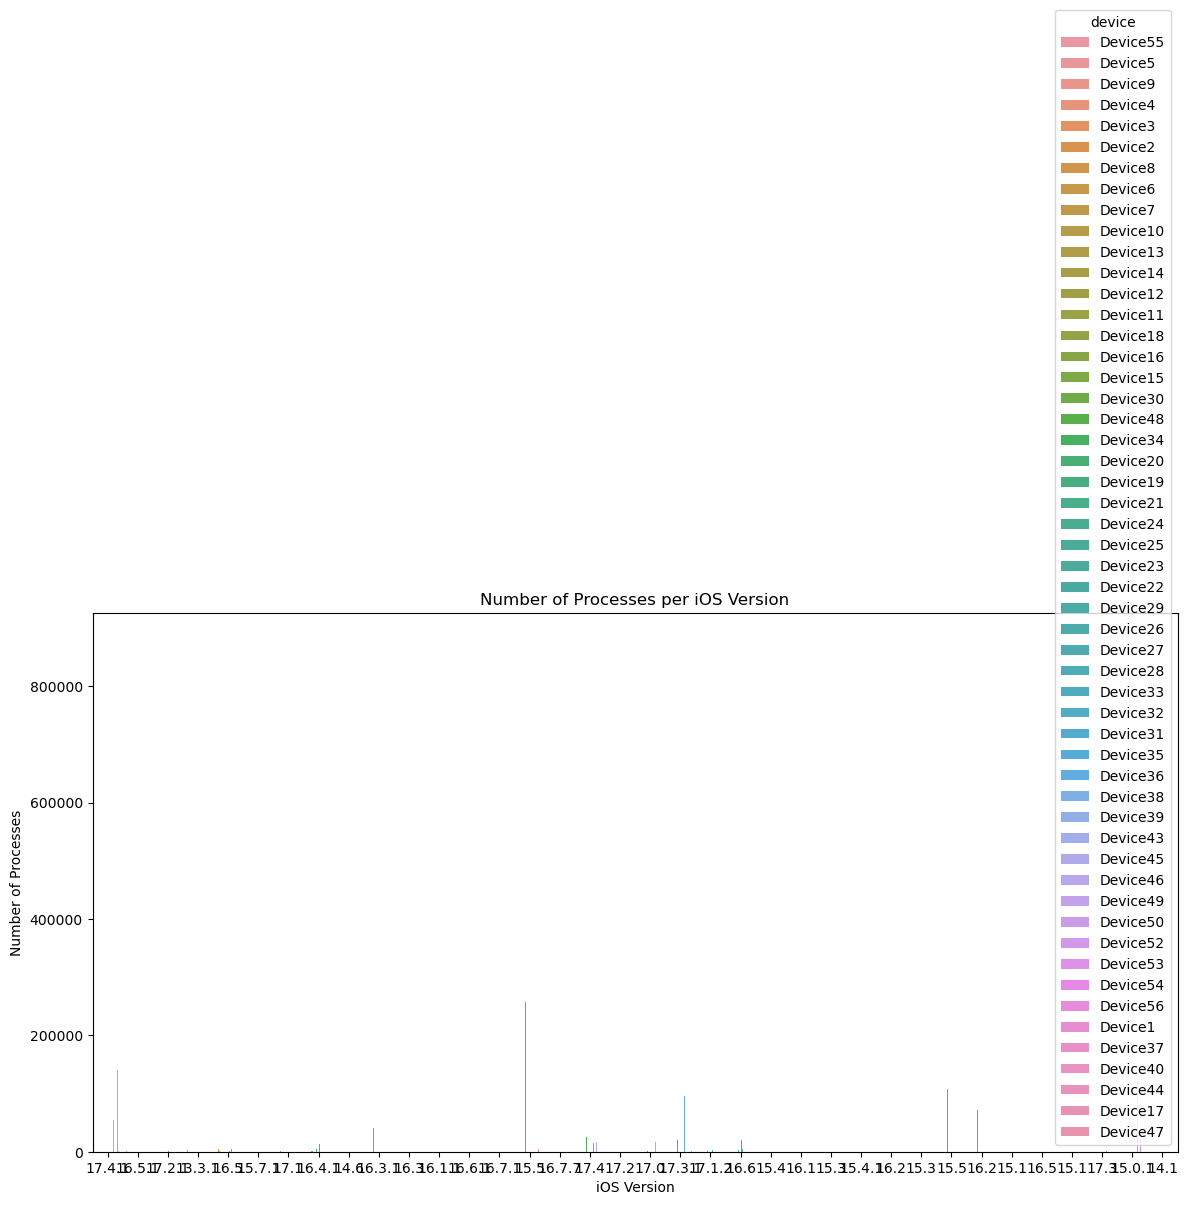

In [17]:
# Number of processes per iOS version
plt.figure(figsize=(14,7))
sns.countplot(x='iOSVersion', hue='device', data=df)
plt.xlabel('iOS Version')
plt.ylabel('Number of Processes')
plt.title('Number of Processes per iOS Version')
plt.show()

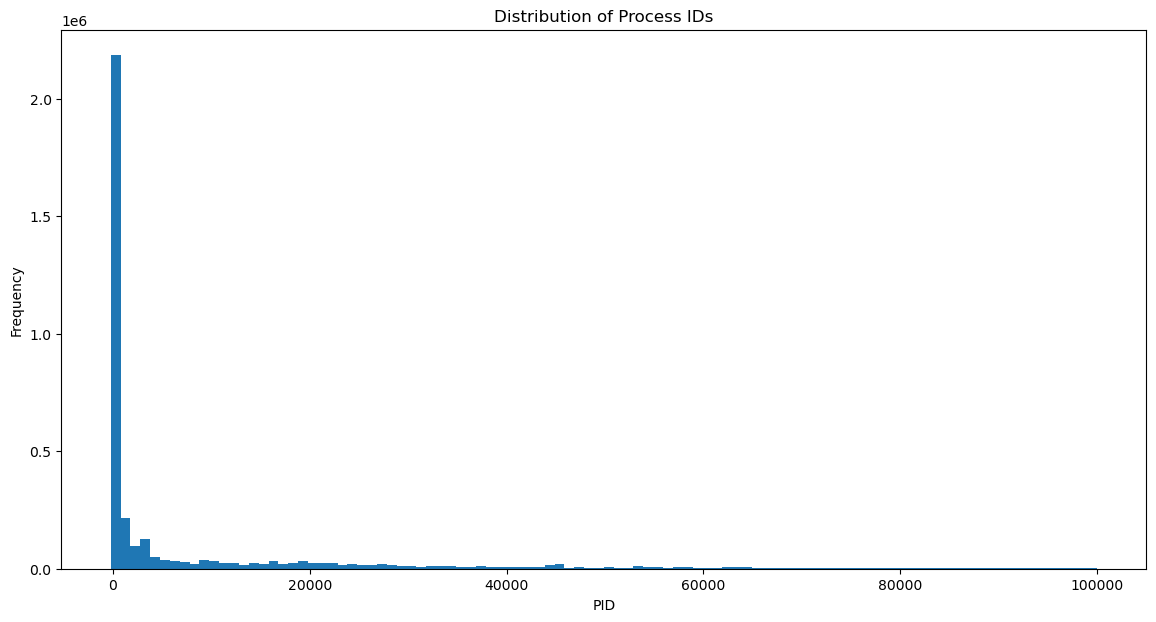

In [18]:
# Analyze PID distribution
plt.figure(figsize=(14, 7))
plt.hist(df['pid'], bins=100)
plt.title('Distribution of Process IDs')
plt.xlabel('PID')
plt.ylabel('Frequency')
plt.show()

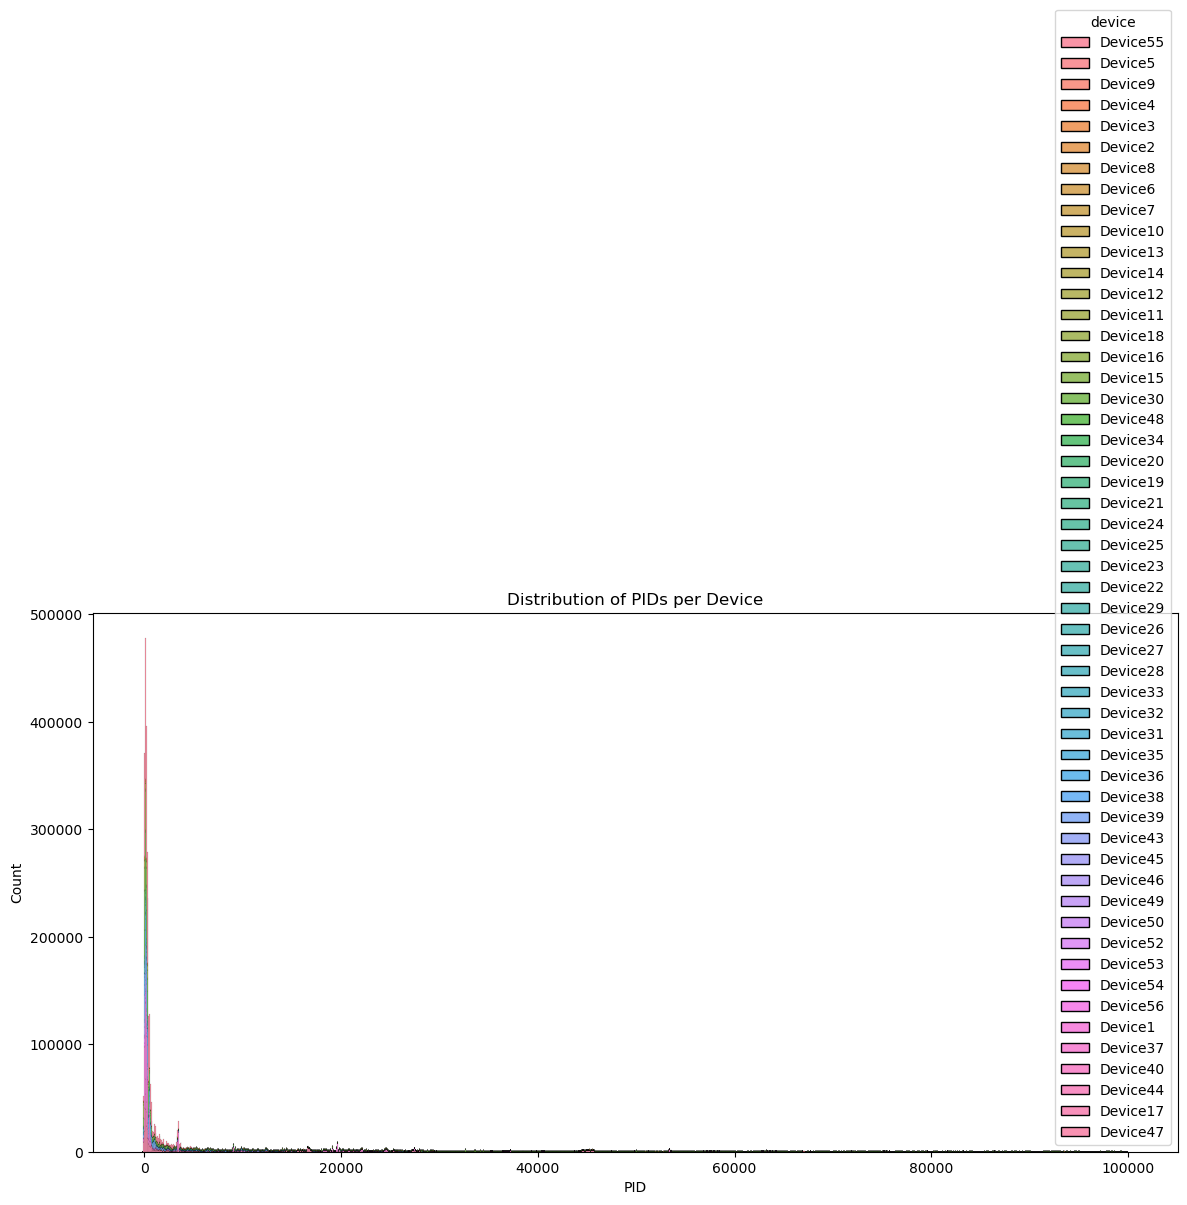

In [19]:
# Distribution of PIDs per Device
plt.figure(figsize=(14,7))
sns.histplot(df, x='pid', hue='device', multiple='stack')
plt.xlabel('PID')
plt.ylabel('Count')
plt.title('Distribution of PIDs per Device')
plt.show()



**Time-based analysis**

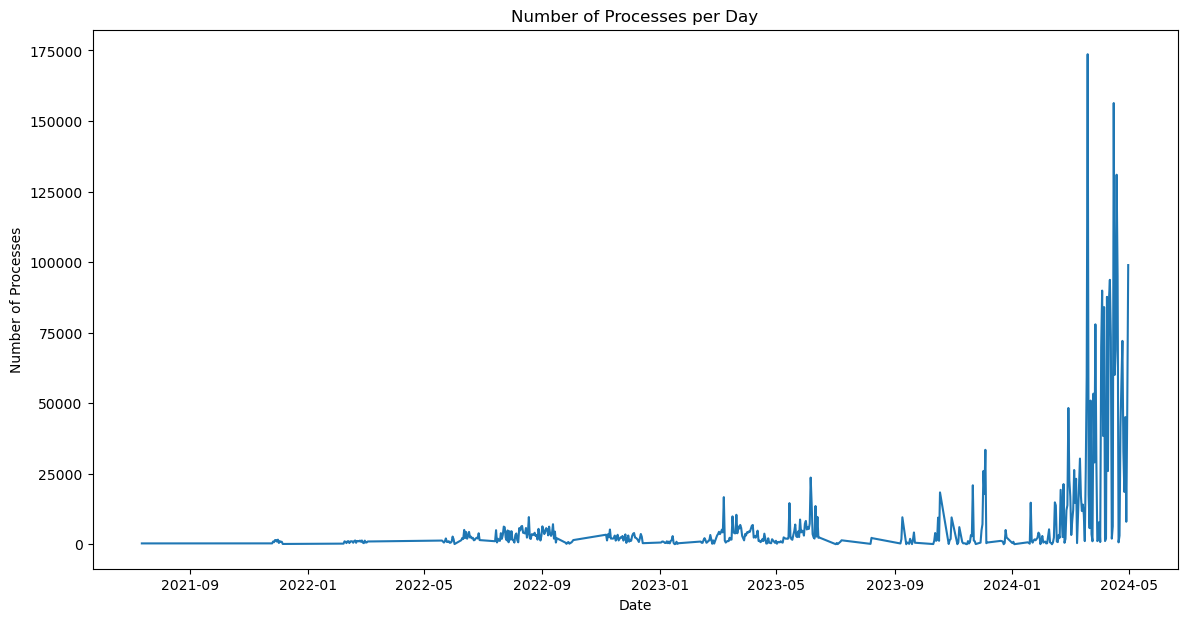

In [20]:
df['date'] = df['timestamp'].dt.date

# Number of processes over time
plt.figure(figsize=(14,7))
temp_df = df.groupby('date').size().reset_index(name='count')
sns.lineplot(x='date', y='count', data=temp_df)
plt.xlabel('Date')
plt.ylabel('Number of Processes')
plt.title('Number of Processes per Day')
plt.show()

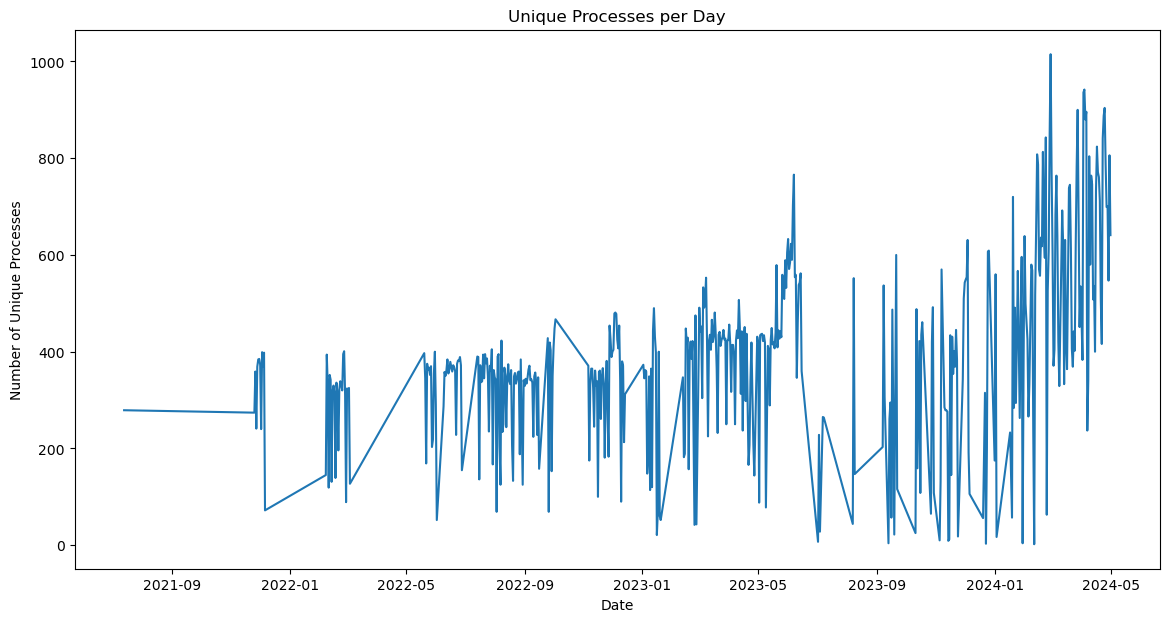

In [21]:
# Analyze process creation over time
plt.figure(figsize=(14, 7))
# Number of unique processes per day
daily_process_counts = df.groupby('date')['procName'].nunique()
daily_process_counts.plot()
plt.title('Unique Processes per Day')
plt.xlabel('Date')
plt.ylabel('Number of Unique Processes')
plt.show()

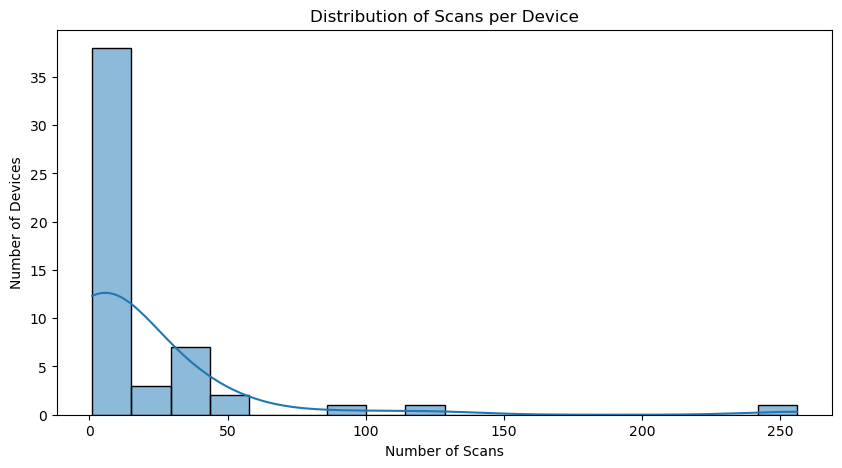

In [22]:
# Visualizations
plt.figure(figsize=(10, 5))
sns.histplot(device_scan_counts, kde=True)
plt.title('Distribution of Scans per Device')
plt.xlabel('Number of Scans')
plt.ylabel('Number of Devices')
plt.show()

We calculated a "non-linearity score" for PID assignments within each scan. A higher score indicates more gaps in PID assignments, which could be normal or could indicate potential issues.

In [23]:
# Analyze PID assignment patterns
def check_pid_linearity(group):
    pids = group['pid'].sort_values()
    diff = pids.diff()
    return (diff != 1).sum() / len(diff)

pid_nonlinearity = df.groupby(['device', 'scan']).apply(check_pid_linearity)
print("\nAverage PID non-linearity score:", pid_nonlinearity.mean())


Average PID non-linearity score: 0.5405149211330398


In [24]:
# Analyze process name patterns
def extract_prefix(name):
    return name.split('.')[0] if '.' in name else name

process_prefixes = df['procName'].apply(extract_prefix)
prefix_counts = process_prefixes.value_counts()

print("\nTop 10 process name prefixes:")
print(prefix_counts.head(10))


Top 10 process name prefixes:
com                      315164
MTLCompilerService        88468
kernel                    42802
mapspushd                 39066
CommCenter                37106
nanotimekitcompaniond     29097
IOMFB_bics_daemon         27829
duetexpertd               27492
installcoordinationd      26187
extensionkitservice       25373
Name: procName, dtype: int64


In [25]:
# Analyze devices with multiple iOS versions
devices_with_multiple_ios = df.groupby('device')['iOSVersion'].nunique()
devices_with_multiple_ios = devices_with_multiple_ios[devices_with_multiple_ios > 1]
print(f"\nDevices with multiple iOS versions: {len(devices_with_multiple_ios)}")


Devices with multiple iOS versions: 14


**Process Persistence:**

We analyzed which processes appear in a high percentage of scans, as persistent processes could be either essential system processes or potentially malicious software.

In [26]:
# Additional analysis: Process persistence
process_persistence = df.groupby('procName')['scan'].nunique() / df['scan'].nunique()


In [27]:
process_persistence.head()

procName
(backupd)     0.001002
(fish)        0.001002
(ps)          0.035070
(taskinfo)    0.002004
-s            0.001002
Name: scan, dtype: float64


Processes present in over 98% of scans:
procName
AppleCredentialManagerDaemon      0.996994
CMFSyncAgent                      0.993988
CacheDeleteAppContainerCaches     0.987976
CommCenter                        1.000000
ContextService                    1.000000
HeuristicInterpreter              0.996994
IMDPersistenceAgent               1.000000
MTLCompilerService                0.989980
MobileBackupCacheDeleteService    0.988978
MobileGestaltHelper               1.000000
Name: scan, dtype: float64


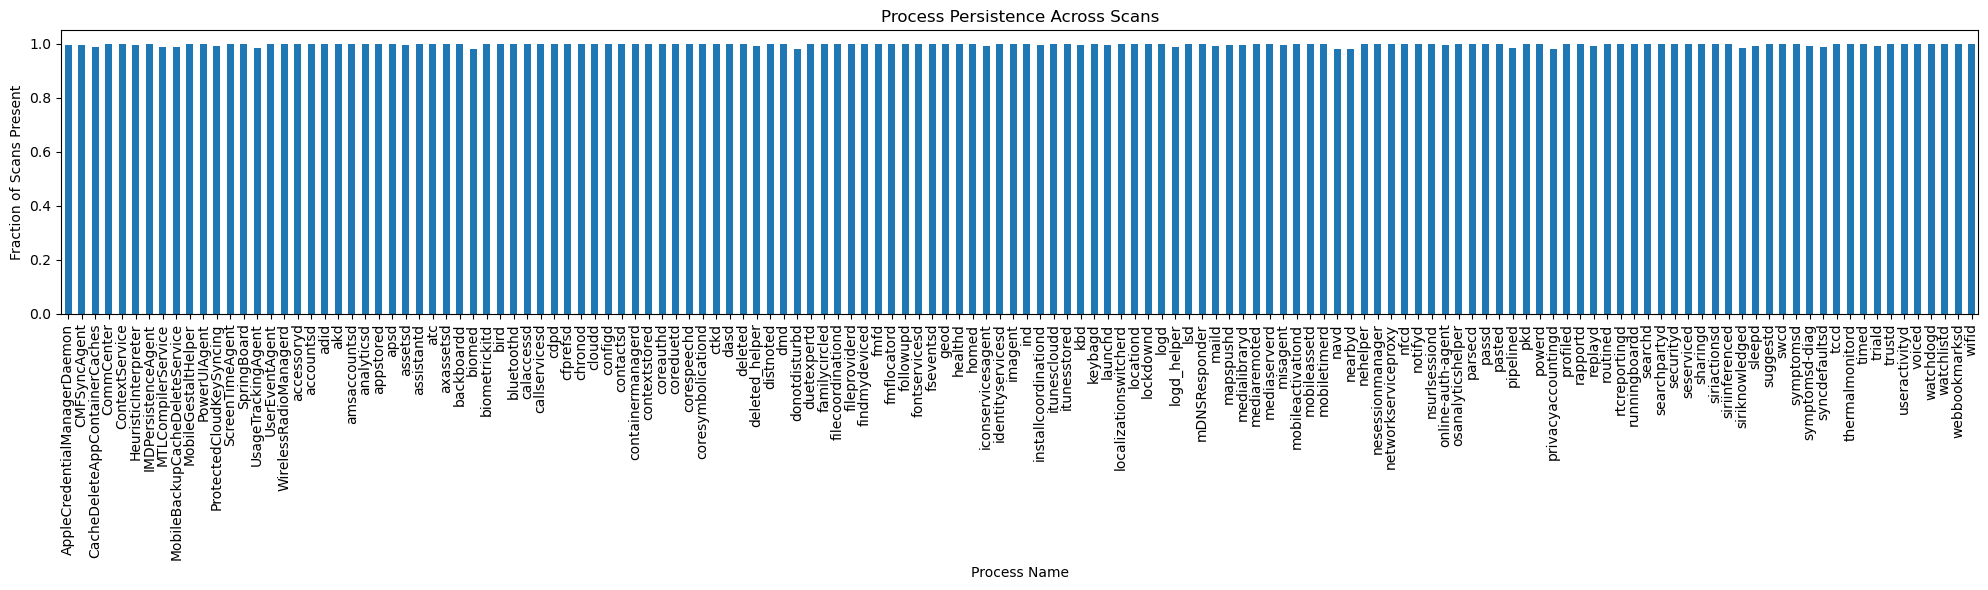

In [28]:
persistent_processes = process_persistence[process_persistence > 0.98]
print("\nProcesses present in over 98% of scans:")
print(persistent_processes.head(10))

# Visualize process persistence
plt.figure(figsize=(20, 6))
persistent_processes.plot(kind='bar')
plt.title('Process Persistence Across Scans')
plt.xlabel('Process Name')
plt.ylabel('Fraction of Scans Present')
plt.xticks(rotation=90)
plt.tight_layout()

In [29]:
# Analyze PID distribution
pid_stats = df.groupby('scan')['pid'].agg(['min', 'max', 'nunique'])
pid_anomalies = pid_stats[pid_stats['nunique'] != pid_stats['max'] - pid_stats['min'] + 1]
print(f"\nNumber of scans with PID anomalies: {len(pid_anomalies)}")


Number of scans with PID anomalies: 998


**Anomaly Detection**
1. String Similarity in Process Names: Detect process names that are similar to benign processes but have slight deviations.
2. Outlier Detection on PIDs: Detect PIDs that are outliers in their range or introduced in an unusual pattern
3. Time-based Anomalies: Identify processes that deviate from the usual pattern over time

In [30]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# Example to find similar process names
def find_similar_processes(data):
    process_names = data['procName'].unique()
    similar_process_pairs = []

    for i, name1 in enumerate(process_names):
        for name2 in process_names[i+1:]:
            if name1 != name2 and similar(name1, name2) > 0.8:
                similar_process_pairs.append((name1, name2))

    return similar_process_pairs

similar_processes = find_similar_processes(df)
print("Similar Process Pairs:", similar_processes)


Similar Process Pairs: [('dprivacyd', 'adprivacyd'), ('backupd', '(backupd)'), ('com.apple.SafariServices.Conten', 'com.apple.SafariServices.ContentBlockerLoader'), ('com.apple.SafariServices.Conten', 'com.apple.SafariServices.Content'), ('PFLHRPeriodPredCK', 'PFLHRPeriodPredMLH'), ('healthappd', 'healthd'), ('com.apple.WebKit.WebContent', 'com.apple.WebKit.WebContent.Cap'), ('com.apple.WebKit.WebContent', 'com.apple.WebKit.WebAuthn'), ('CoreSpotlightImportExtension1_i', 'CoreSpotlightImportExtension1_iOS'), ('CoreSpotlightImportExtension1_i', 'CoreSpotlightImportExtension1_iO'), ('EAUpdaterService', 'UARPUpdaterServiceHID'), ('EAUpdaterService', 'UARPUpdaterServiceAFU'), ('adattributiond', 'spaceattributiond'), ('adattributiond', 'attributionkitd'), ('tvremoted', 'remoted'), ('MTLCompilerService', 'ANECompilerService'), ('MTLCompilerService', 'AGXCompilerService'), ('ProactiveShareSheetLighthouseBa', 'ProactiveShareSheetLighthouseBackgroundPlugin'), ('ProactiveShareSheetLighthouseBa',

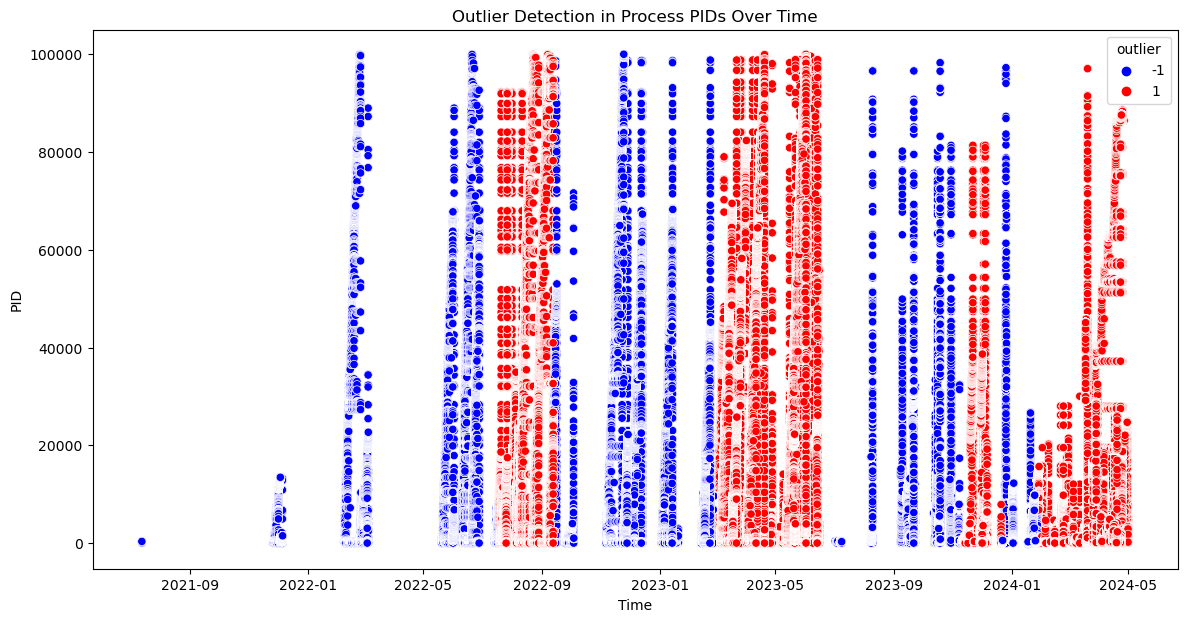

In [31]:
# Time-based Outlier Detection
from sklearn.ensemble import IsolationForest

# Ensure no missing timestamps
df['timestamp'] = df['timestamp'].dropna()
timestamps = df['timestamp'].values.reshape(-1, 1)

clf = IsolationForest(contamination=0.1,random_state=0).fit(timestamps)
outliers = clf.predict(timestamps)
df['outlier'] = outliers

# Visualization of Outliers
plt.figure(figsize=(14,7))
sns.scatterplot(x='timestamp', y='pid', hue='outlier', data=df, palette=['blue', 'red'])
plt.xlabel('Time')
plt.ylabel('PID')
plt.title('Outlier Detection in Process PIDs Over Time')
plt.show()

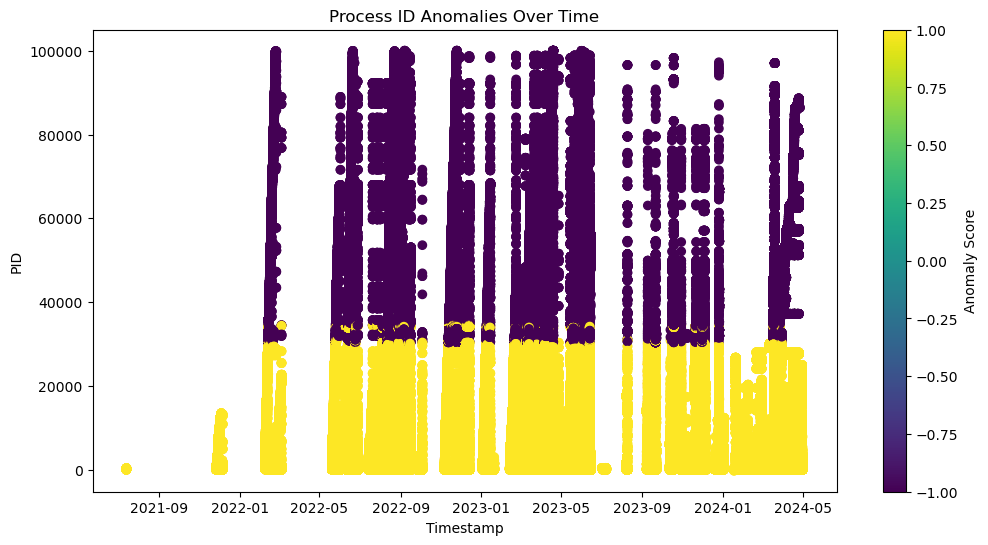

In [32]:
# Use Isolation Forest for anomaly detection
features = ['pid']
clf = IsolationForest(contamination=0.1, random_state=42)
df['anomaly_score'] = clf.fit_predict(df[features])

# Identify potential anomalies
anomalies = df[df['anomaly_score'] == -1]
#print("\nPotential anomalies detected:")
#print(anomalies[['device', 'scan', 'procName', 'pid']])

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df['timestamp'], df['pid'], c=df['anomaly_score'], cmap='viridis')
plt.title('Process ID Anomalies Over Time')
plt.xlabel('Timestamp')
plt.ylabel('PID')
plt.colorbar(label='Anomaly Score')
plt.show()


Most common PIDs:
0.0     45914
93.0    12490
94.0    12103
49.0    11925
98.0    11633
Name: pid, dtype: int64


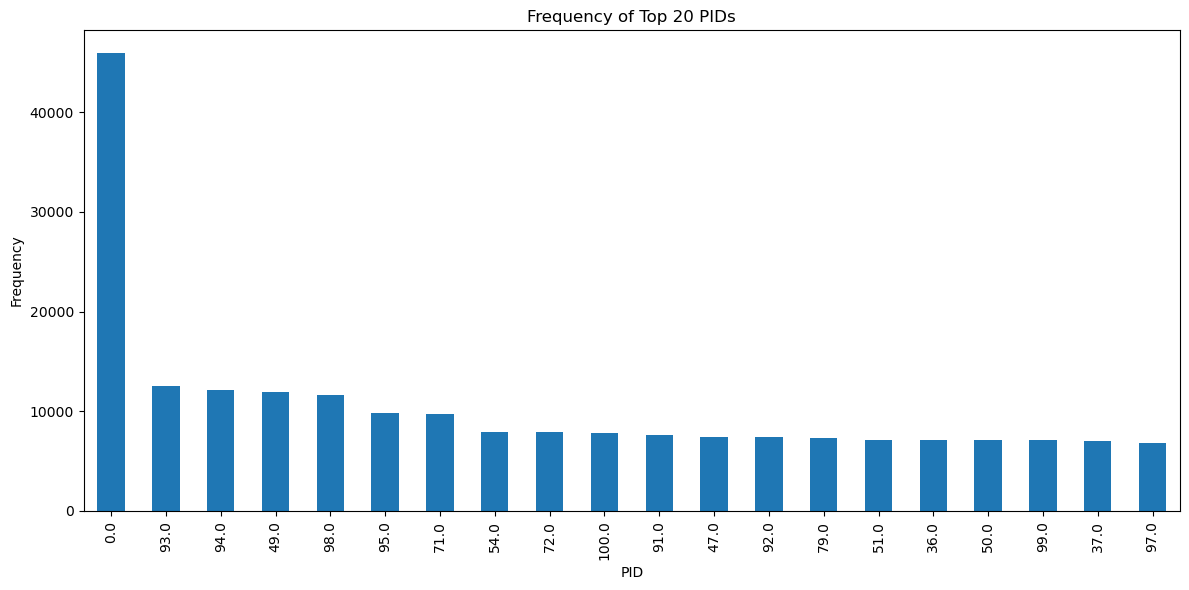


Percentage of scans with all unique PIDs: 58.42%


In [33]:
# Treat PIDs as categorical
pid_frequency = df['pid'].value_counts()
print("\nMost common PIDs:")
print(pid_frequency.head())

# Visualize PID frequency
plt.figure(figsize=(12, 6))
pid_frequency.head(20).plot(kind='bar')
plt.title('Frequency of Top 20 PIDs')
plt.xlabel('PID')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Analyze PID uniqueness within scans
def check_pid_uniqueness(group):
    return group['pid'].nunique() == len(group)

pid_uniqueness = df.groupby(['device', 'scan']).apply(check_pid_uniqueness)
print(f"\nPercentage of scans with all unique PIDs: {pid_uniqueness.mean()*100:.2f}%")
